<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/nlp_cfindustries_earningreport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### trying to do some of the NLP on an earnings report from CF industries
they own one of the biggest pollution plants in louisiana, problem is the NLP thing we did in class he had some really good data from like 5 years of Earning reports but I dont know how to find that so its not that interesting from one report.

In [ ]:

!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.6 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=eef9a4a28e5f5802c169400c340c00a9b705cf9441c569848b2756ea55efb266
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext
  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32624 sha256=ece40a1fdf7552697b41eef5b752ed598d119f785ae9f42f7f802691f4a83a61
  Stored in directory: /root/.cache/pip/wheels/27/ba/2f/37420d1191bdae5e855d69b8e913673045bfd395cbd78ad697
Successfully built tika
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [ ]:
url = "https://github.com/emetcalf-vas/Group19_QM2/raw/main/data/CFQ3_earnings_report.pdf"



In [ ]:
raw = parser.from_file(url)

2025-01-17 15:17:48,699 [MainThread  ] [INFO ]  Retrieving https://github.com/emetcalf-vas/Group19_QM2/raw/main/data/CFQ3_earnings_report.pdf to /tmp/emetcalf-vas-group19_qm2-raw-main-data-cfq3_earnings_report.pdf.
INFO:tika.tika:Retrieving https://github.com/emetcalf-vas/Group19_QM2/raw/main/data/CFQ3_earnings_report.pdf to /tmp/emetcalf-vas-group19_qm2-raw-main-data-cfq3_earnings_report.pdf.
2025-01-17 15:17:49,662 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2025-01-17 15:17:54,133 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tik

In [ ]:
date=raw['metadata']['dcterms:created']
#title=raw['metadata']['dc:title']
raw_text=raw['content']

print('Date: ', date)
#print('Title: ', title)
print('Word Count: ', len(raw_text))
print('Text:')
raw_text

Date:  2025-01-16T20:06:24Z
Word Count:  51208
Text:


"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGood day, ladies and gentlemen, and welcome to CS Industries' first nine months and\nthird\nquarter, 2024.\nAll participants will be in the listen-only mode.\nShould you need assistance, please signal a conference specialist by pressing the \nstar\nkey followed by zero.\nWe will facilitate a question and answer session towards the end of this \npresentation.\nSuppose a question at any time, please press star, then one on your touch-tone \nphone.\nI would now like to turn the presentation over to your host for today, Mr. Martin \nJerozick\nwith CF Investor Relations.\nSir, please proceed.\nGood morning, and thanks for joining the CF Industries Earnings Conference Call.\nWith me today are Tony Will, President and CEO, Chris Bone, Executive Vice \nPresident and\nChief Operating Officer, Bert Frost, Executive Vice President of Sales, Market \nDevelopment\nand Supply Chain, and Greg Cameron, Executive Vice President and Chie

In [ ]:
import re
global_warming = re.findall(r'health', raw_text, re.IGNORECASE)
environment =  re.findall(r'environment', raw_text, re.IGNORECASE)
climate = re.findall(r'climate', raw_text, re.IGNORECASE)
profit = re.findall(r'profit', raw_text, re.IGNORECASE)
growth = re.findall(r'growth', raw_text, re.IGNORECASE)
cancer = re.findall(r'cancer', raw_text, re.IGNORECASE)
health = re.findall(r'health', raw_text, re.IGNORECASE)

print(growth)

['growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth', 'growth']


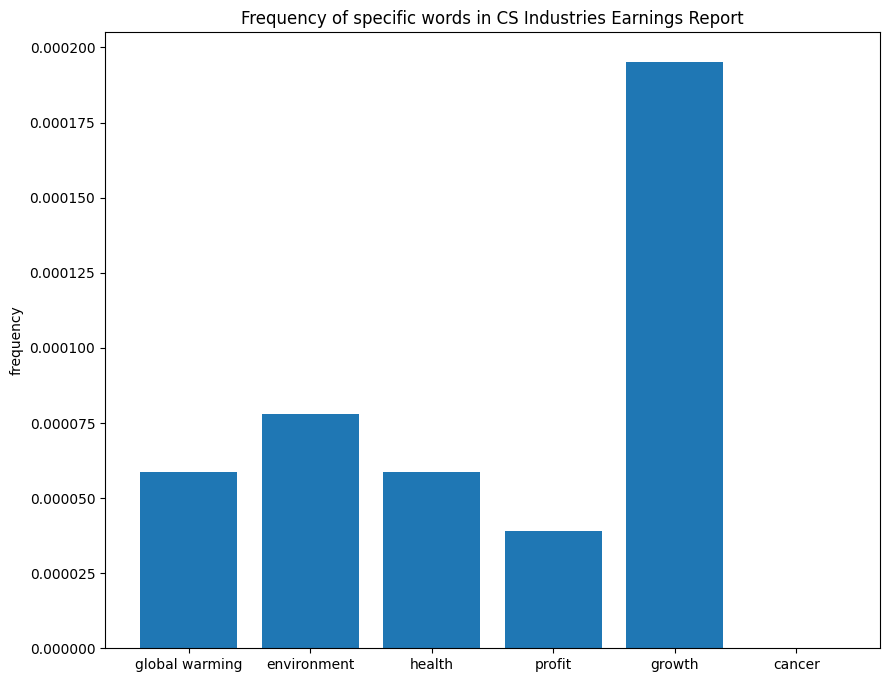

In [ ]:

counts = [len(global_warming)/51208, len(environment)/51208, len(health)/51208, len(profit)/51208, len(growth)/51208, len(cancer)/51208]
terms = ["global warming", "environment", "health", "profit", "growth", "cancer"]

plt.bar(terms, counts)
plt.ylabel("frequency")
#plt.xlabel("words picked")
plt.title("Frequency of specific words in CS Industries Earnings Report")

plt.show()

In [ ]:
environment_sentences=re.findall(r"([^.]*environment[^.]*)"," ".join(raw_text))

print(len(environment_sentences))

for sentence in environment_sentences[:10]:
  print('\n', sentence)

0
